In [52]:
# Importing the Libraries & Reading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("Binance_1INCHBTC_d.csv", header=1)

In [54]:
df.head()

,Unix,Date,Symbol,Open,High,Low,Close,Volume 1INCH,Volume BTC,tradecount
0,1712188800000,2024-04-04,1INCHBTC,0.000008,0.000008,0.000008,0.000008,146649.2,1.188874,784
1,1712102400000,2024-04-03,1INCHBTC,0.000008,0.000008,0.000008,0.000008,184248.6,1.516869,3074
2,1712016000000,2024-04-02,1INCHBTC,0.000009,0.000009,0.000008,0.000008,346705.1,2.900660,1691
3,1711929600000,2024-04-01,1INCHBTC,0.000009,0.000009,0.000008,0.000009,418967.0,3.642781,3404
4,1711843200000,2024-03-31,1INCHBTC,0.000009,0.000009,0.000009,0.000009,105479.9,0.908705,1303


In [55]:
# Prediction should be done here on the closing
# price (Close)---> y

# Keeping only the relevant columns 

df = df[["Date","Close"]]
df


,Date,Close
0,2024-04-04,0.000008
1,2024-04-03,0.000008
2,2024-04-02,0.000008
3,2024-04-01,0.000009
4,2024-03-31,0.000009
...,...,...
1192,2020-12-29,0.000032
1193,2020-12-28,0.000041
1194,2020-12-27,0.000040
1195,2020-12-26,0.000060


In [56]:
# Checking the dimensions
df.shape

(1197, 2)

In [57]:
# checking the datatype of date column
df.dtypes

Date      object
Close    float64
dtype: object

In [58]:
# Checking minimum & maximum value for date 
df['Date'].min(),df['Date'].max()

('2020-12-25', '2024-04-04')

In [59]:
# Sorting date in ascending order
df = df.sort_values('Date', ascending=True)

In [60]:
df.head()

,Date,Close
1196,2020-12-25,0.000093
1195,2020-12-26,0.000060
1194,2020-12-27,0.000040
1193,2020-12-28,0.000041
1192,2020-12-29,0.000032


In [61]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [62]:
# Grouping the date together
df = df.groupby('Date')['Close'].sum().reset_index()
df.shape

(1197, 2)

In [63]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
y= df['Close'].resample('M').mean()

In [64]:
df.head()

,Close
Date,
2020-12-25,0.000093
2020-12-26,0.000060
2020-12-27,0.000040
2020-12-28,0.000041
2020-12-29,0.000032


In [65]:
y.head()

Date
2020-12-31    0.000050
2021-01-31    0.000056
2021-02-28    0.000107
2021-03-31    0.000076
2021-04-30    0.000091
Freq: M, Name: Close, dtype: float64

In [66]:
y.shape

(41,)

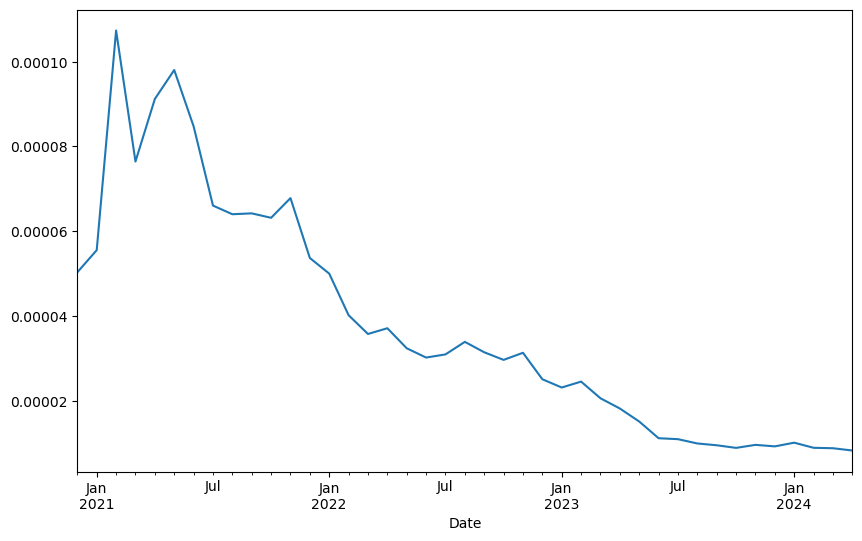

In [67]:
#Plotting the graph for 'y'

y.plot(figsize=(10,6))
plt.show()

In [80]:
# Splitting the train data
train = y.loc[ :'2024-02-28']
print(train.shape)
train

(38,)


Date
2020-12-31    0.000050
2021-01-31    0.000056
2021-02-28    0.000107
2021-03-31    0.000076
2021-04-30    0.000091
2021-05-31    0.000098
2021-06-30    0.000085
2021-07-31    0.000066
2021-08-31    0.000064
2021-09-30    0.000064
2021-10-31    0.000063
2021-11-30    0.000068
2021-12-31    0.000054
2022-01-31    0.000050
2022-02-28    0.000040
2022-03-31    0.000036
2022-04-30    0.000037
2022-05-31    0.000032
2022-06-30    0.000030
2022-07-31    0.000031
2022-08-31    0.000034
2022-09-30    0.000031
2022-10-31    0.000030
2022-11-30    0.000031
2022-12-31    0.000025
2023-01-31    0.000023
2023-02-28    0.000025
2023-03-31    0.000021
2023-04-30    0.000018
2023-05-31    0.000015
2023-06-30    0.000011
2023-07-31    0.000011
2023-08-31    0.000010
2023-09-30    0.000009
2023-10-31    0.000009
2023-11-30    0.000010
2023-12-31    0.000009
2024-01-31    0.000010
Freq: M, Name: Close, dtype: float64

In [81]:
# Splitting the test data 
# I have kept the test data interval to be a week
# before the final date '2024-04-04'. 

test = y.loc['2024-03-28':]
print(test.shape)
test

(2,)


Date
2024-03-31    0.000009
2024-04-30    0.000008
Freq: M, Name: Close, dtype: float64

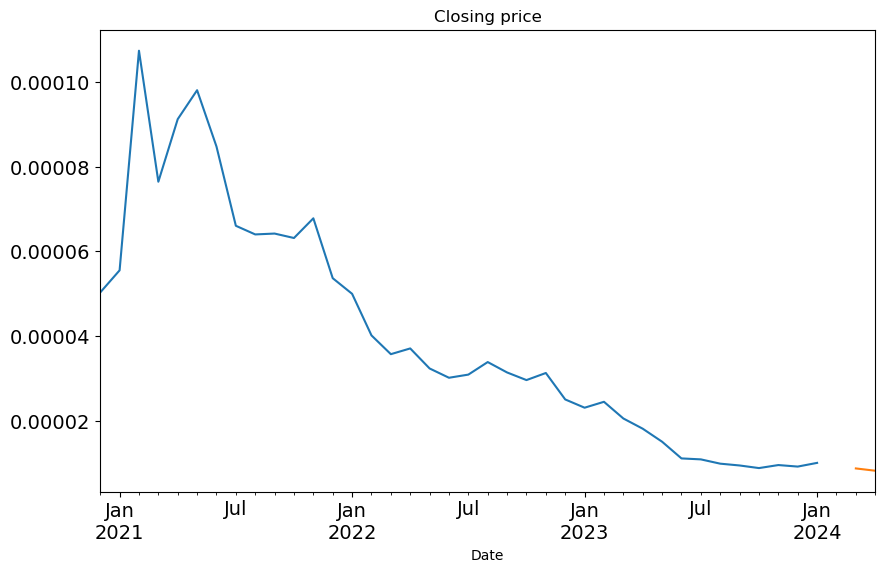

In [70]:
# Plotting the train & test data
train.plot(figsize=(10,6),title='Closing price',fontsize = 14)
test.plot(figsize=(10,6),title='Closing price',fontsize = 14)
plt.show()

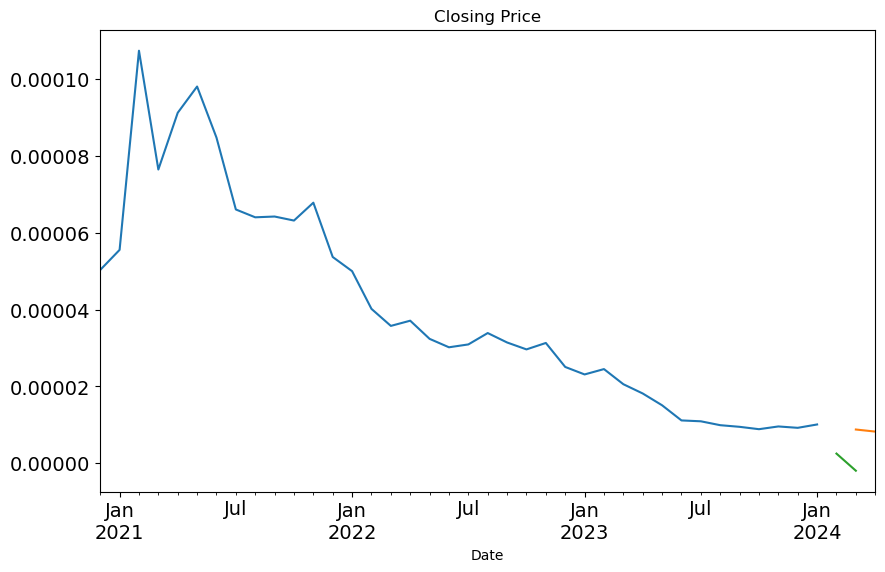

In [82]:
# Holt Winter model
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()

# smoothing level = beta
# aplha value should be in the range of 0 to 1
# values close to 0 indicate that older values are very less compared to the recent values.
# values close to 1 indicate that older values are equally important.

fit1 = ExponentialSmoothing(train,seasonal_periods = 12, trend = 'add', seasonal = 'add').fit()
Holt_Winter_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6),title='Closing Price',fontsize = 14)
test.plot(figsize=(10,6),title='Closing Price',fontsize = 14)
Holt_Winter_df['Holt_linear'].plot(figsize=(10,6),title='Closing Price',fontsize = 14)
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_linear']))
print(rmse)

8.45346746718899e-06


In [ ]:
# I have got a RMSE 8.45 e-06 which is quite 
# low confirming the fact that the forecast 
# of Holt-Winter model for Closing price 
# would be accurate.